In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv('data.csv')

def g(x, c):
    return c[0] + c[1]*np.cos(x) + c[2]*np.sin(x) + c[3]*x + c[4]*(x**2) + c[5]*np.log(x)

In [16]:
df.head()

,1.000000000000000000e+00,3.373743086105866240e+01
0,1.008016,33.849696
1,1.016032,33.910573
2,1.024048,34.024778
3,1.032064,34.126853
4,1.040080,34.221529


In [17]:
x_data = df.iloc[:, 0].values
y_data = df.iloc[:, 1].values

In [18]:
A = np.column_stack((np.ones_like(x_data),
                     np.cos(x_data),
                     np.sin(x_data),
                     x_data,
                     x_data**2,
                     np.log(x_data)))

In [19]:
coeffs, residuals, rank, s = np.linalg.lstsq(A, y_data, rcond=None)
print("Fitted coefficients:")
for i, c in enumerate(coeffs):
    print(f"c[{i}] = {c}")

Fitted coefficients:
c[0] = 1.1960802258037966
c[1] = 11.973170517795744
c[2] = 29.98325078081914
c[3] = -0.189048612498918
c[4] = 1.0197615395154318
c[5] = 5.154643095394769


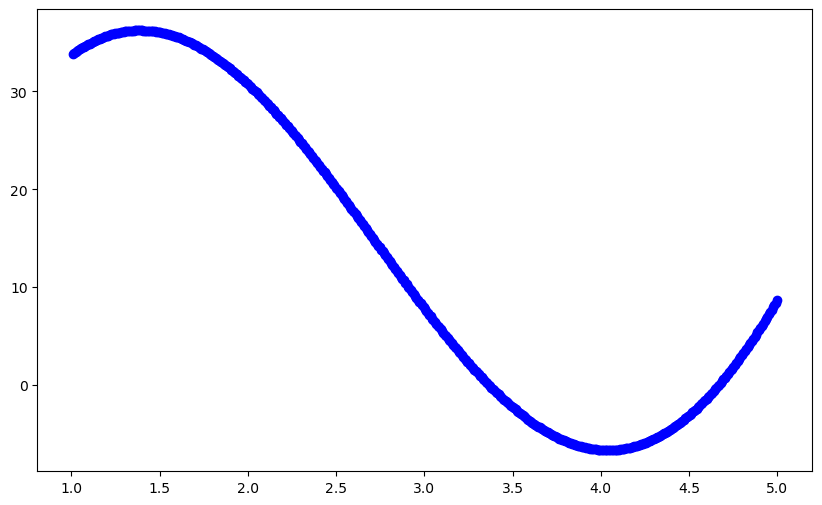

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data', color='blue')

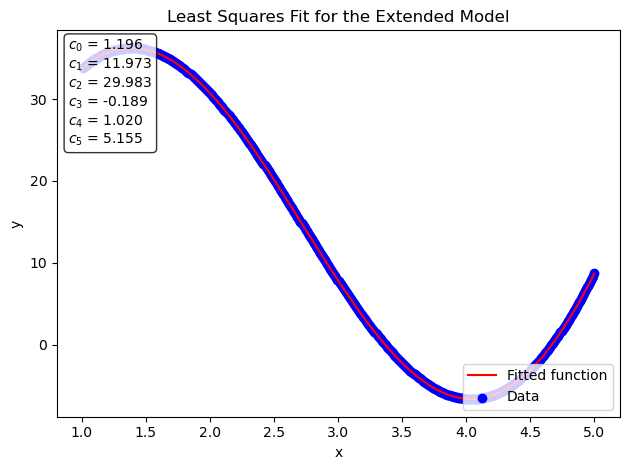

In [31]:
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
plt.plot(x_fit, g(x_fit, coeffs), label='Fitted function', color='red')

plt.scatter(x_data, y_data, label='Data', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Fit for the Extended Model')

coeff_text = f'$c_0$ = {coeffs[0]:.3f}\n$c_1$ = {coeffs[1]:.3f}\n$c_2$ = {coeffs[2]:.3f}\n$c_3$ = {coeffs[3]:.3f}\n$c_4$ = {coeffs[4]:.3f}\n$c_5$ = {coeffs[5]:.3f}'
plt.text(0.02, 0.98, coeff_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


plt.legend(loc='lower right')
plt.tight_layout()
plt.show()